<a href="https://colab.research.google.com/github/noreallyimfine/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Copy_of_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# Create data
data = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

# Func to calculate mean cuz I was a little confused about the question
def mean(l):
  return sum(l) / len(l)

In [11]:
# Run it on our data
mean(data)

3052.714285714286

In [0]:
# Function to calculate variance and std dev of an array
def var_n_std(a):
  mean = sum(a) / len(a)
  var = sum([((i - mean) ** 2) for i in a])
  std = (var/len(a)) ** 0.5
  print('Variance is: ', var / len(a))
  print('Standard deviation of is ', std) 

In [108]:
# Run it on our data
var_n_std(data)

Variance is:  183761.06122448976
Standard deviation of is  428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import pandas as pd
import numpy as np

In [23]:
# Customer data
cust = [127, 80, 105, 92, 120, 115, 93]

# Make dataframe
df = pd.DataFrame({'customers': cust, 'sales': data})

# Check
df

,customers,sales
0,127,3505
1,80,2400
2,105,3027
3,92,2798
4,120,3700
5,115,3250
6,93,2689


In [85]:
# COnfirm were getting correct answers
df.describe()

,customers,sales
count,7.000000,7.000000
mean,104.571429,3052.714286
std,17.057326,463.020415
min,80.000000,2400.000000
25%,92.500000,2743.500000
50%,105.000000,3027.000000
75%,117.500000,3377.500000
max,127.000000,3700.000000


In [86]:
# more confirming
df.sales.var(), df.sales.std()

(214387.90476190473, 463.0204150595357)

In [109]:
# more confirming
df.customers.var(), df.customers.std()

(290.95238095238096, 17.057326313123664)

In [117]:
# Calculate Variance-Covariance Matrix
df.cov()

,customers,sales
customers,290.952381,7604.357143
sales,7604.357143,214387.904762


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [120]:
# correlation coefficient calculation
den = (df.customers.std() * df.sales.std())

df.cov() / den

,customers,sales
customers,0.036839,0.962834
sales,0.962834,27.144959


The covariance values are correct but the numbers on the main diagonal are wrong. This is because those arent covariance values but variance and they will always have an r of 1

In [158]:
# Built in correlation calculation
df.corr()

,customers,sales
customers,1.000000,0.962834
sales,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [124]:
# Read in file, correcting for index
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col=0)

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [122]:
titanic.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [127]:
# Select just numeric columns
titanic_num = titanic.select_dtypes(include=np.number)

titanic_num.head()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [128]:
# Variance-Covariance Matrix
titanic_num.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [129]:
# Correlation Coefficient Matrix
titanic_num.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

(-5, 5)

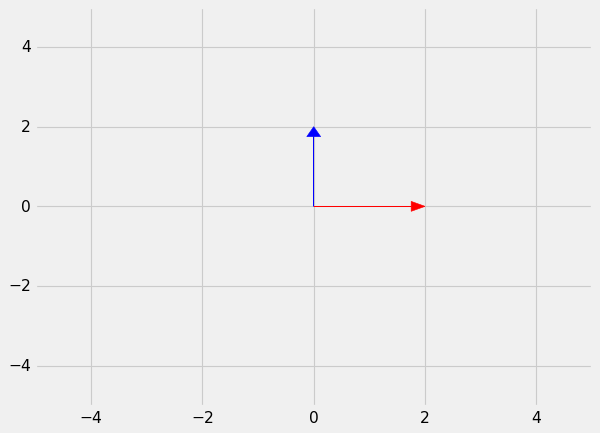

In [135]:
plt.style.use('fivethirtyeight')

# 2 othrogonal vectors
a = [2, 0]
b = [0, 2]

# Plotted
plt.arrow(0,0, a[0], a[1], length_includes_head=True, head_width=0.25, head_length=0.25, color='r')
plt.arrow(0,0, b[0], b[1], length_includes_head=True, head_width=0.25, head_length=0.25, color='b')

plt.xlim(-5,5)
plt.ylim(-5,5)



Orthogonal == Perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

Theyre dot-product is (-30+-24+14=) -40 therefore they are not orthogonal

In [144]:
# Create 2 arrays
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

# Calculate dot product
np.dot(a, b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

Norm Squared = (2*2) + (-15*-15) + (6*6) + (20*20) = 665

In [143]:
# Create vector
c = np.array([2, -15, 6, 20])

# Calculate norm
np.linalg.norm(c) ** 2

665.0

Dot product will be same as norm-squared 665

In [150]:
# Transpose of c
c_t = c.T

# Multiply them together
np.matmul(c_t, c)

665

Guess they are all the same

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
e = 2 \begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} -8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [168]:
# Create vector
f = [4, 12, 11, 9, 2]

# Calculate its unit vector
f / np.linalg.norm(f)

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

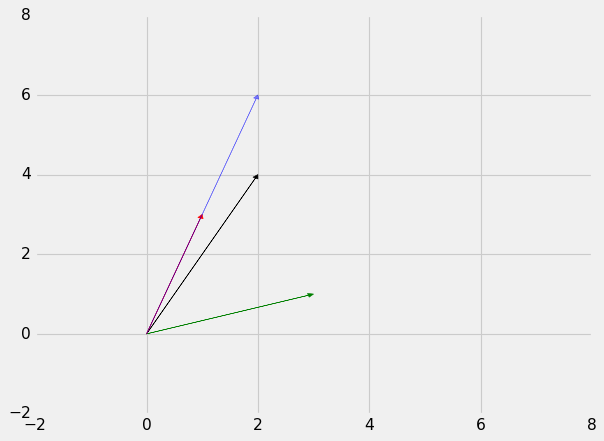

In [164]:
# Linearly independent vectors
u = [2, 4]
v = [3, 1]

# Linearly dependent vectors
w = [1, 3]
t = [2, 6]

# Plotted
plt.arrow(0,0, u[0], u[1], length_includes_head=True, head_width=0.1, head_length=0.1, color='k')
plt.arrow(0,0, v[0], v[1], length_includes_head=True, head_width=0.1, head_length=0.1, color='g')
plt.arrow(0,0, w[0], w[1], length_includes_head=True, head_width=0.1, head_length=0.1, color='r')
plt.arrow(0,0, t[0], t[1], length_includes_head=True, head_width=0.1, head_length=0.1, color='b', alpha= 0.5)

# Set axis limits
plt.xlim(-2, 8)
plt.ylim(-2, 8);

Black and Green vectors are linearly independent and can span all of 2d space. Red and Blue vectors are linearly dependent.

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

R or 1-dimension

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

Rcubed or 3-dimensions

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



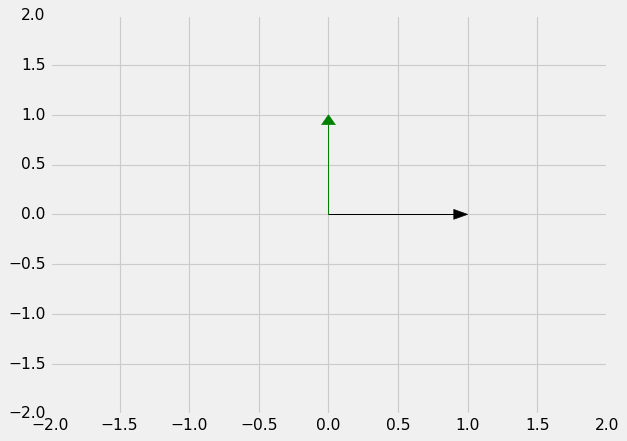

In [166]:
# Create 2 vectors that are linearly independent
i = [1, 0]
j = [0, 1]

# Plot them
plt.arrow(0,0, i[0], i[1], length_includes_head=True, head_width=0.1, head_length=0.1, color='k')
plt.arrow(0,0, j[0], j[1], length_includes_head=True, head_width=0.1, head_length=0.1, color='g')

# Set axis limits
plt.xlim(-2,2)
plt.ylim(-2,2);

## 6.2 What does it mean to form a basis?

That all possible linear transformations of that space can be accomplished by scaling and combining these vectors

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [167]:
# Create matrix
p = [[1,2,3], [-1,0,7], [4, 8, 2]]

# Calculate matrix rank
np.linalg.matrix_rank(p)

3

P has a rank of 3

## 7.2 What does the rank of a matrix tell us?

The number of linearly independent vectors it contains, which in turn tells us its span

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

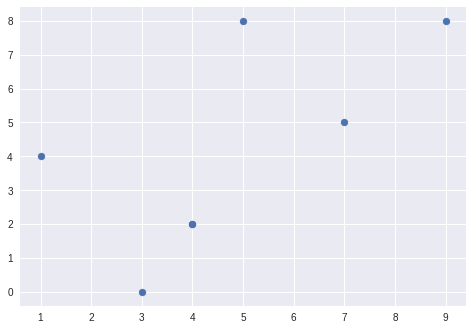

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()